<a href="https://colab.research.google.com/github/Karen-AP/Proyectos-programacion/blob/main/Estad%C3%ADsticos_gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random
import math
import scipy.stats as stats
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [12]:
diamonds=sns.load_dataset("diamonds")
print(diamonds.head(6))

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48


In [13]:
print(diamonds.info())
print(diamonds.shape)
print(diamonds.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None
(53940, 10)
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.

In [14]:
# Crear un diccionario vacío para almacenar información sobre las variables
diccionario = {'Nombre Variable': [], 'Tipo Variable': [], 'Escala Medición': []}

# Iterar sobre cada columna del DataFrame 'diamonds'
for columna in diamonds.columns:
    # Determinar el tipo de variable: 'Cualitativa' o 'Cuantitativa' según el tipo de datos
    tipo = 'Cualitativa' if diamonds[columna].dtype == 'object' else 'Cuantitativa'

    # Determinar la escala de medición según el tipo de variable
    if tipo == 'Cualitativa':
        # Si la columna tiene más de dos valores únicos, es una variable nominal, de lo contrario, ordinal
        escala = 'Nominal' if len(diamonds[columna].unique()) > 2 else 'Ordinal'
    else:
        # Si la columna es de tipo numérico (int o float), la escala es 'Razón', de lo contrario, 'Intervalo'
        escala = 'Razon' if diamonds[columna].dtype in ['int64', 'float64'] else 'Intervalo'

    # Agregar la información de la columna al diccionario
    diccionario['Nombre Variable'].append(columna)
    diccionario['Tipo Variable'].append(tipo)
    diccionario['Escala Medición'].append(escala)

# Crear un DataFrame a partir del diccionario para mostrar la información de las variables
informacion_variables_df = pd.DataFrame(diccionario)

informacion_variables_df


,Nombre Variable,Tipo Variable,Escala Medición
0,carat,Cuantitativa,Razon
1,cut,Cuantitativa,Intervalo
2,color,Cuantitativa,Intervalo
3,clarity,Cuantitativa,Intervalo
4,depth,Cuantitativa,Razon
5,table,Cuantitativa,Razon
6,price,Cuantitativa,Razon
7,x,Cuantitativa,Razon
8,y,Cuantitativa,Razon
9,z,Cuantitativa,Razon


In [15]:
# Extraer la columna 'price' del DataFrame 'diamonds' en una variable
precio_diamantes = diamonds['price']

# Crear un DataFrame con los resultados de las estadísticas descriptivas
resultados = pd.DataFrame({
    'Media': [np.mean(precio_diamantes)],  # Media aritmética
    'Mediana': [np.median(precio_diamantes)],  # Mediana
    'Cuartil 1': [np.percentile(precio_diamantes, 25)],  # Cuartil 1 (25%)
    'Percentil 38': [np.percentile(precio_diamantes, 38)],  # Percentil 38
    'Decil 7': [np.percentile(precio_diamantes, 70)],  # Decil 7 (70%)
    'Rango': [np.ptp(precio_diamantes)],  # Rango: diferencia entre el valor máximo y mínimo
    'Desviación Estándar': [np.std(precio_diamantes)],  # Desviación estándar
    'Coeficiente de Variación': [(np.std(precio_diamantes) / np.mean(precio_diamantes)) * 100]  # Coeficiente de variación
})

resultados

,Media,Mediana,Cuartil 1,Percentil 38,Decil 7,Rango,Desviación Estándar,Coeficiente de Variación
0,3932.799722,2401.0,950.0,1601.0,4662.0,18497,3989.402758,101.439255


In [16]:
# Dividir la variable 'precio_diamantes' en 11 intervalos
f = pd.cut(precio_diamantes, bins=11).value_counts().sort_index()

# Calcular la frecuencia relativa (frecuencia absoluta / número total de observaciones)
fr = f / len(diamonds)

# Calcular la frecuencia acumulada abajo en valores absolutos y relativos
FA_abajo_abs = f.cumsum()  # Frecuencia acumulada abajo (absoluta)
FA_abajo_rel = FA_abajo_abs / len(diamonds)  # Frecuencia acumulada abajo (relativa)

# Calcular la frecuencia acumulada arriba en valores absolutos y relativos
FA_arriba_abs = f[::-1].cumsum()[::-1]  # Frecuencia acumulada arriba (absoluta)
FA_arriba_rel = FA_arriba_abs / len(diamonds)  # Frecuencia acumulada arriba (relativa)

# Crear un DataFrame para mostrar la tabla de frecuencias
tabla_frecuencias = pd.DataFrame()
tabla_frecuencias['Clase'] = f.index  # Intervalos de clases
tabla_frecuencias['Frecuencia Absoluta'] = f.values  # Frecuencia absoluta
tabla_frecuencias['Frecuencia Relativa'] = fr.values  # Frecuencia relativa
tabla_frecuencias['Frecuencia Acumulada Abajo (Absoluta)'] = FA_abajo_abs.values  # Frecuencia acumulada abajo (absoluta)
tabla_frecuencias['Frecuencia Acumulada Abajo (Relativa)'] = FA_abajo_rel.values  # Frecuencia acumulada abajo (relativa)
tabla_frecuencias['Frecuencia Acumulada Arriba (Absoluta)'] = FA_arriba_abs.values  # Frecuencia acumulada arriba (absoluta)
tabla_frecuencias['Frecuencia Acumulada Arriba (Relativa)'] = FA_arriba_rel.values  # Frecuencia acumulada arriba (relativa)

# Ordenar por la columna 'Clase' (intervalos)
tabla_frecuencias = tabla_frecuencias.sort_values(by=['Clase']).reset_index(drop=True)

print(tabla_frecuencias)

                     Clase  Frecuencia Absoluta  Frecuencia Relativa  \
0      (307.503, 2007.545]                24246             0.449499   
1     (2007.545, 3689.091]                 8991             0.166685   
2     (3689.091, 5370.636]                 7344             0.136151   
3     (5370.636, 7052.182]                 4153             0.076993   
4     (7052.182, 8733.727]                 2526             0.046830   
5    (8733.727, 10415.273]                 1861             0.034501   
6   (10415.273, 12096.818]                 1420             0.026326   
7   (12096.818, 13778.364]                 1108             0.020541   
8   (13778.364, 15459.909]                  871             0.016148   
9   (15459.909, 17141.455]                  774             0.014349   
10    (17141.455, 18823.0]                  646             0.011976   

    Frecuencia Acumulada Abajo (Absoluta)  \
0                                   24246   
1                                   33237   


In [17]:
# Mostrar la tercera fila de la tabla de frecuencias
tabla_frecuencias.iloc[2]

,2
Clase,"(3689.091, 5370.636]"
Frecuencia Absoluta,7344
Frecuencia Relativa,0.136151
Frecuencia Acumulada Abajo (Absoluta),40581
Frecuencia Acumulada Abajo (Relativa),0.752336
Frecuencia Acumulada Arriba (Absoluta),20703
Frecuencia Acumulada Arriba (Relativa),0.383815


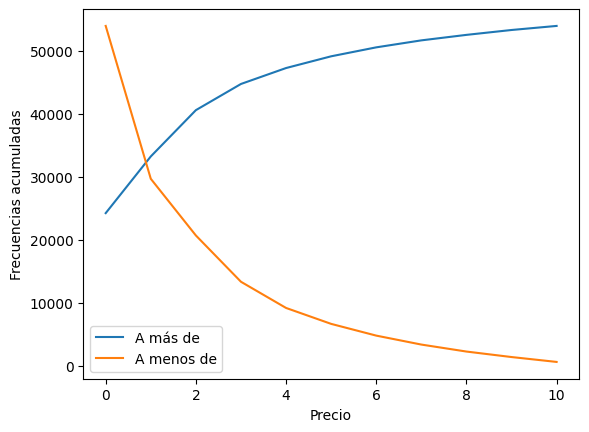

In [18]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Graficar la frecuencia acumulada abajo (absoluta)
ax.plot(tabla_frecuencias['Frecuencia Acumulada Abajo (Absoluta)'].index,
        tabla_frecuencias['Frecuencia Acumulada Abajo (Absoluta)'].values, label='A más de')

# Graficar la frecuencia acumulada arriba (absoluta)
ax.plot(tabla_frecuencias['Frecuencia Acumulada Arriba (Absoluta)'].index,
        tabla_frecuencias['Frecuencia Acumulada Arriba (Absoluta)'].values, label='A menos de')

# Etiquetas de los ejes
ax.set_xlabel('Precio')
ax.set_ylabel('Frecuencias acumuladas')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

In [19]:
#creando una tabla con la distribución de los precios de los diamantes en 5 intervalos utilizando pd.cut(), y luego calcula las frecuencias absolutas, frecuencias relativas y
# los puntos medios de esos intervalos
rangos = pd.cut(precio_diamantes, bins=5).value_counts().sort_index()
tabla1=pd.DataFrame()
tabla1["Precio"]=rangos.index
tabla1["Punto Medio"]=(tabla1["Precio"].apply(lambda x: x.mid)).astype(float)
tabla1["Frecuencia Absoluta"]=rangos.values
tabla1["Frecuencia Relativa%"]=round(tabla1["Frecuencia Absoluta"]*100/len(precio_diamantes),2)
tabla1= tabla1.sort_values(by=["Precio"]).reset_index(drop=True)


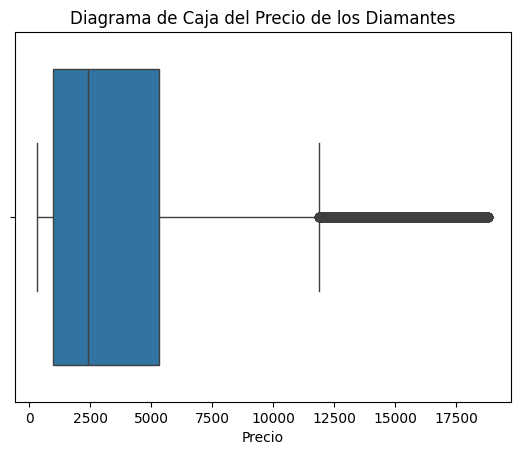

Valor mínimo atípico: 11886


In [20]:
# diagrama de caja (boxplot) para visualizar la distribución del precio de los diamantes y también identifica los valores atípicos en el conjunto de datos.
sns.boxplot(x=precio_diamantes)

plt.title('Diagrama de Caja del Precio de los Diamantes')
plt.xlabel('Precio')
plt.show()

Q1 = precio_diamantes.quantile(0.25)
Q3 = precio_diamantes.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = diamonds[(precio_diamantes < limite_inferior) | (precio_diamantes > limite_superior)]
minimo_valor_atipico = valores_atipicos['price'].min()

print("Valor mínimo atípico:", minimo_valor_atipico)

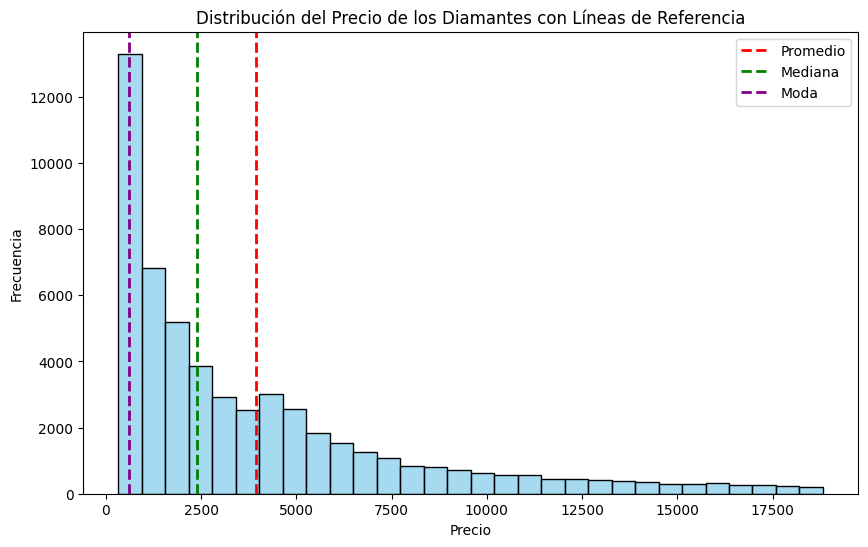

In [21]:
#histograma para visualizar la distribución del precio de los diamantes e incluye líneas de referencia para el promedio, la mediana y la moda.
plt.figure(figsize=(10, 6))
sns.histplot(precio_diamantes, bins=30, kde=False, color='skyblue')
#línea verticales para mostrar estadísticos
plt.axvline(precio_diamantes.mean(), color='red', linestyle='dashed', linewidth=2, label='Promedio')
plt.axvline(precio_diamantes.median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(precio_diamantes.mode().values[0], color='purple', linestyle='dashed', linewidth=2, label='Moda')
#Etiquetas y titulos
plt.title('Distribución del Precio de los Diamantes con Líneas de Referencia')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

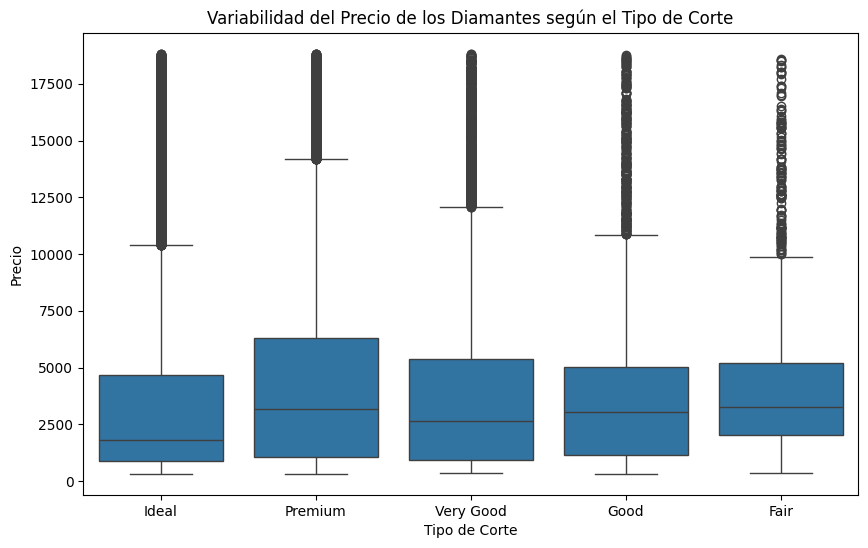

In [22]:
#Boxplot de la variable cut con respecto al precio
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds)

plt.title('Variabilidad del Precio de los Diamantes según el Tipo de Corte')
plt.xlabel('Tipo de Corte')
plt.ylabel('Precio')

plt.show()